## Final Project Submission

Please fill out:
* Student name: Josh Blumer
* Student pace: Self Paced 
* Scheduled project review date/time: Feb. 12th 12:00P.M. 
* Instructor name: Jeff Herman
* Blog post URL:


# Exploratory Data Analysis

## Import Necessary Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt

## Import and Preview Data File

In [ ]:
# Read file in as Pandas dataframe

df = pd.read_csv('kc_house_data.csv')
df.head()

In [ ]:
# Explore numeric value summary statistics

df.describe(include = 'all')

In [ ]:
# Explore file metadata

df.info()

## Begin EDA and Cleaning

In [ ]:
# Change sqft_basement datatype to float

df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors = 'coerce')

In [ ]:
# Change date datatype to datetime object

df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

In [ ]:
# Verify change

df['date'].head()

In [ ]:
# Datetime objects cannot be graphed for visual interpretation so we will derive years old
# by subtracting year_built from date to give us continuous values that can be graphed

df['yrs_old'] = [i.year for i in df['date']] - df['yr_built']
df['yrs_old'].head()

In [ ]:
# Drop original date column after extracting age information

df.drop(['date'], axis = 1, inplace = True)

In [ ]:
# Check to verify change

df.info()

### Inspect Columns for Missing Values

In [ ]:
# Check columns for null values

df.isnull().sum()

In [328]:
# Impute missing 'view' values with column mode

df['view'] = df['view'].fillna(df['view'].mode()[0])

In [329]:
# Impute missing 'waterfront' values with column mode

df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])

In [203]:
# Verify null entries were edited. The remaining missing values with be removed 
# after checking features for multicollinearity

df.isnull().sum()

price         0
bedrooms      0
bathrooms     0
sqft_lot      0
floors        0
waterfront    0
view          0
condition     0
grade         0
zipcode       0
lat           0
long          0
yrs_old       0
month_sold    0
renovated     0
basement      0
dtype: int64

## Check Features for Multicollinearity

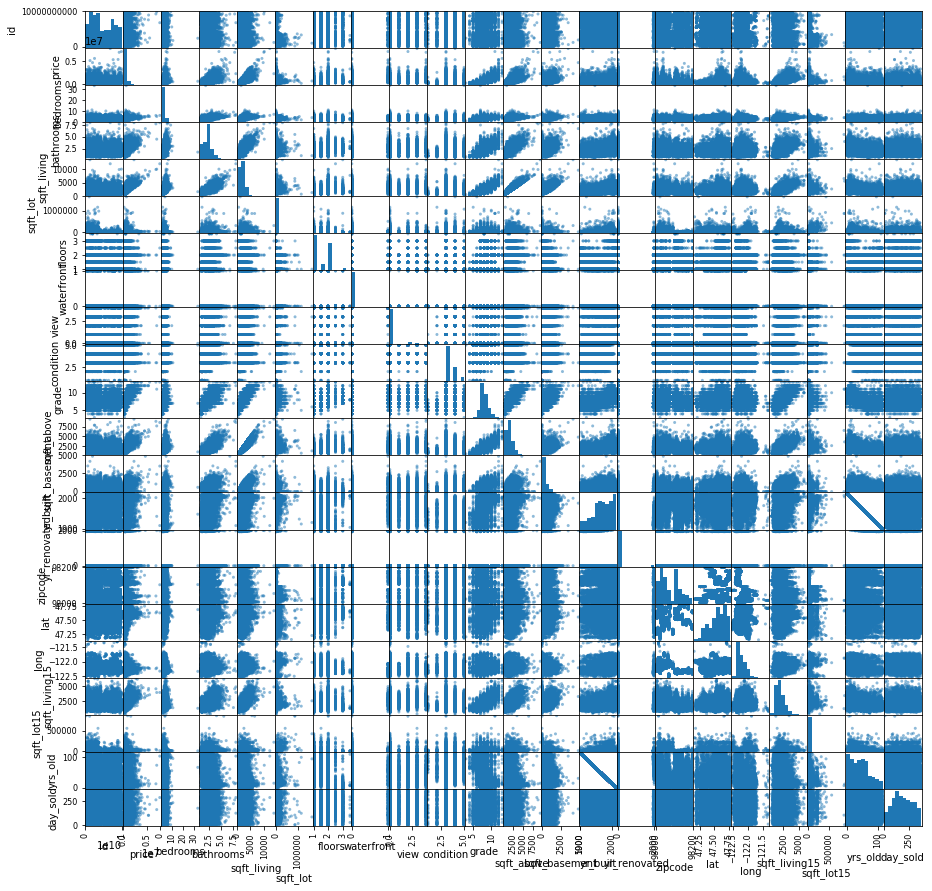

In [16]:
# Examine features for linear relationships

pd.plotting.scatter_matrix(df,figsize  = [15, 15]);
plt.show()

In [17]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_old,day_sold
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,...,-0.004548,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.021458,-0.011436
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,...,0.325008,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.053890,-0.011486
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,...,0.302683,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.155817,-0.001794
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,...,0.282693,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.507561,0.007024
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,...,0.434576,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.318592,0.011368
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,...,0.015533,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.052853,-0.002576
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,...,-0.245144,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.489514,0.013619
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,...,0.084949,-0.024487,0.081397,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.024406,0.009473
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,...,0.275440,-0.054452,0.100977,0.085059,0.006321,-0.077702,0.278928,0.073083,0.054467,-0.004177
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,...,0.170972,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.360836,0.021967


In [18]:
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_old,day_sold
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Sqft_living is highly correlated with bathrooms, grade, sqft_above, and sqft_living15. It is the most highly correlated with the target variable so we will be retaining it and removing the others due to them all being related to square footage. We will also be dropping 'id' because it isnt necessary.

In [330]:
df.drop(['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'id', 'yr_built'], axis = 1, inplace = True)

In [331]:
# Binarize yr_renovated to renovated and drop year_renovated to 

df['renovated'] = [0 if i == 0.0 else 1 for i in df['yr_renovated']]
df.drop(['yr_renovated'], axis = 1, inplace = True)

In [332]:
# Binarize sqft_basement to basement and drop sqft_basement 

df['basement'] = [0 if i == 0.0 else 1 for i in df['sqft_basement']]
df.drop(['sqft_basement'], axis = 1, inplace = True)

In [333]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,yrs_old,renovated,basement
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,59,0,0
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,63,1,1
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,82,1,0
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,49,0,1
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,28,0,0


## Examine Feature Variables for Outliers

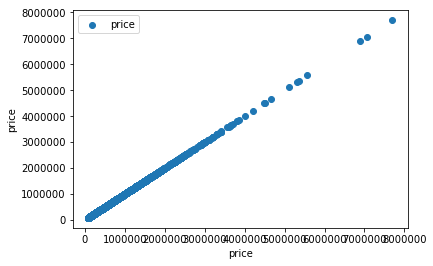

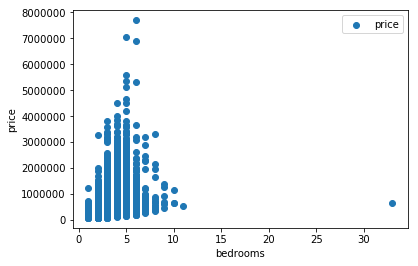

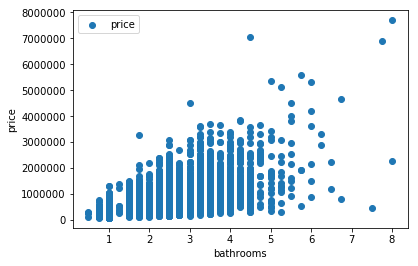

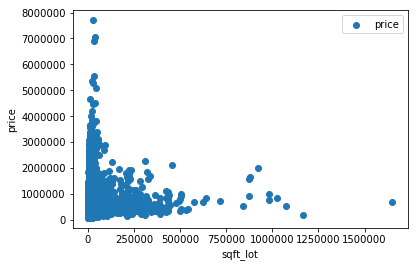

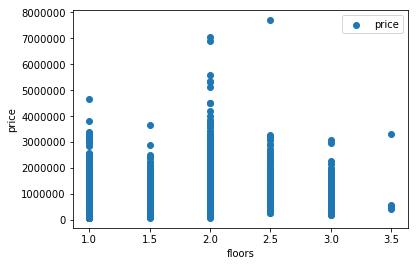

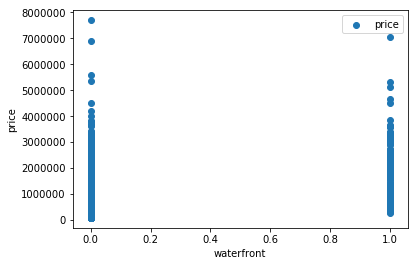

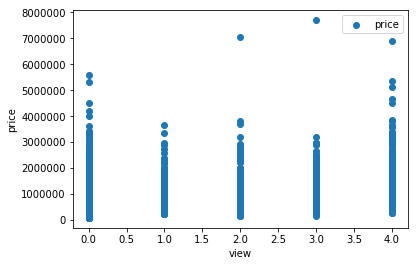

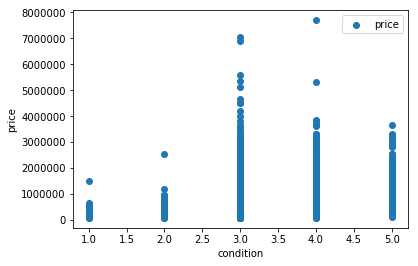

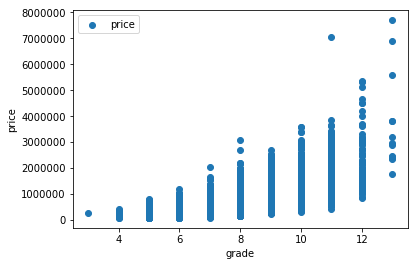

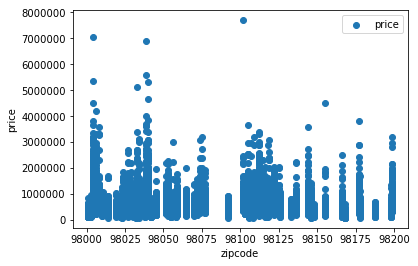

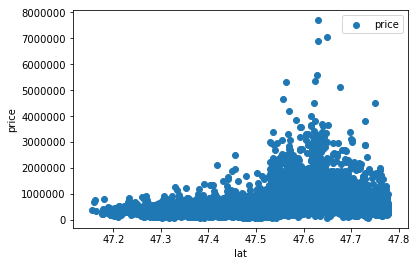

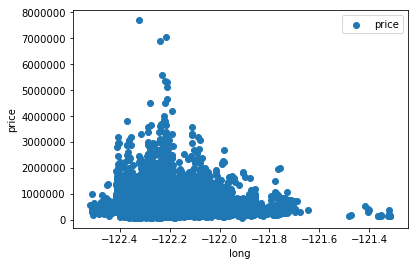

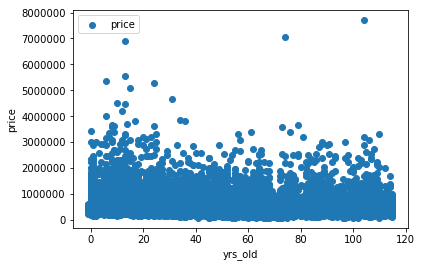

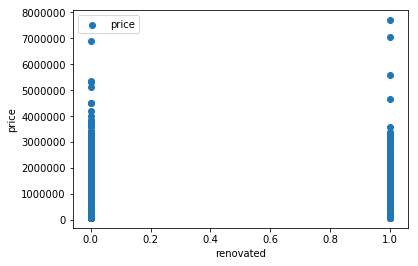

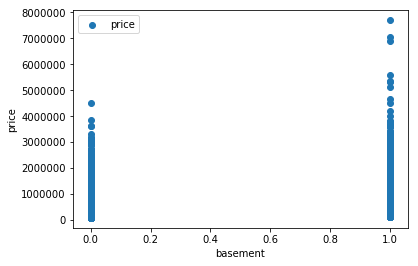

In [334]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    plt.scatter(x = df[col], y = df['price'])
    plt.ylabel('price')
    plt.xlabel(col)
    plt.legend()

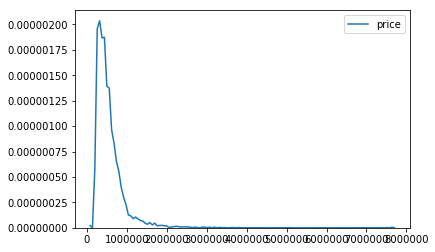

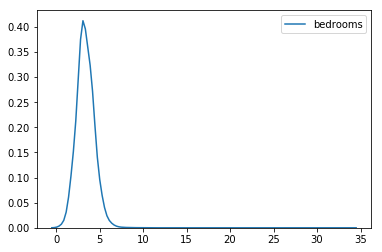

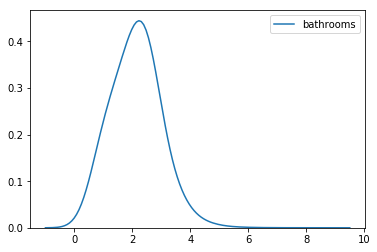

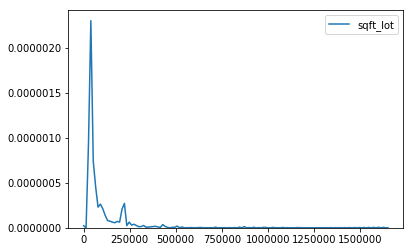

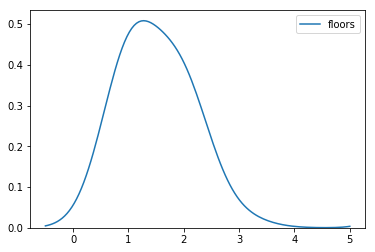

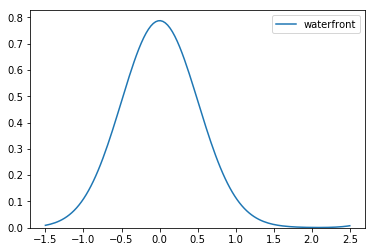

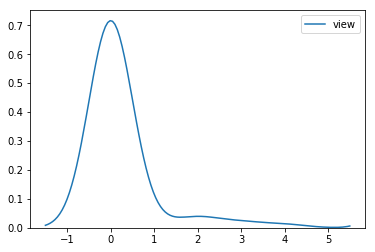

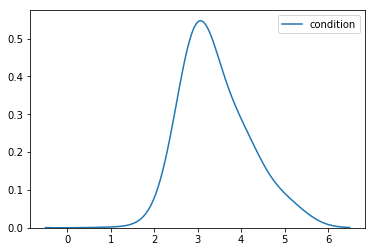

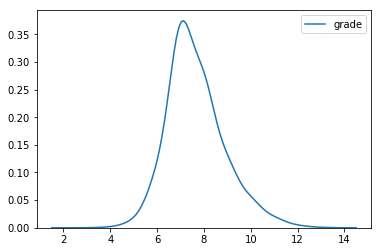

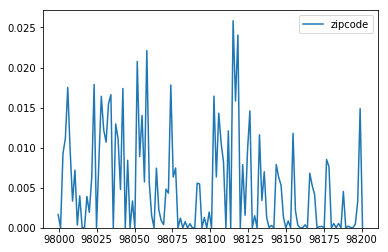

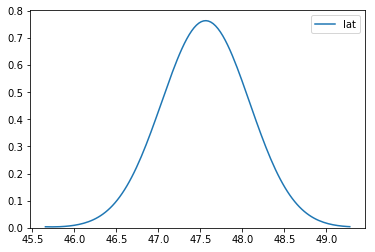

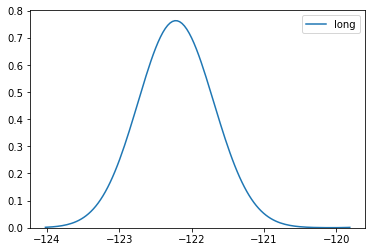

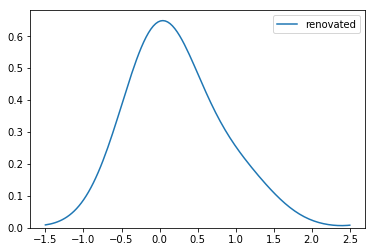

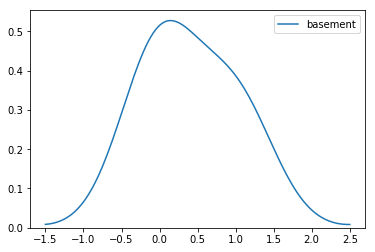

In [264]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.kdeplot(df[col], bw = 0.5)

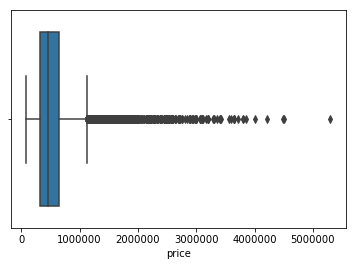

In [119]:
sns.boxplot(df['price'])

In [399]:
dfh = dfh[(dfh['price'] >= 0) & (dfh['price'] <= 1000000)]

In [400]:
df.price.shape

(21079,)

In [345]:
df = df[(df['bedrooms'] >= 0) & (df['bedrooms'] <= 10)]

# Feature Engineering

In [335]:
from haversine import haversine

seattle = [47.6092, -122.3363]
bellevue = [47.61555, -122.20392]

In [336]:
haversine(seattle, bellevue, unit ='mi')

6.181695095872431

In [337]:
df['lat_long'] = tuple(zip(df.lat, df.long))

In [338]:
seattle_distances = []
for i in df['lat_long']:
    seattle_distances.append(haversine((seattle), (i), unit = 'mi'))
df['distance_from_seattle'] = pd.Series(seattle_distances)

bellevue_distances = []
for i in df['lat_long']:
    bellevue_distances.append(haversine((bellevue), (i), unit = 'mi'))
df['distance_from_bellevue'] = pd.Series(bellevue_distances)

In [339]:
df['distance_from_city'] = df[['distance_from_bellevue', 'distance_from_seattle']].min(axis = 1)

In [271]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,renovated,basement,lat_long,distance_from_seattle,distance_from_bellevue,distance_from_city
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,0,0,"(47.5112, -122.257)",7.714868,7.622786,7.622786
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,1,1,"(47.721000000000004, -122.319)",7.766476,9.041882,7.766476
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,1,0,"(47.7379, -122.23299999999999)",10.107949,8.561145,8.561145
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,0,1,"(47.5208, -122.39299999999999)",6.655340,10.979730,6.655340
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,0,0,"(47.6168, -122.045)",13.578402,7.402273,7.402273


In [129]:
df.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,lat,long,sqft_lot15,yrs_old,day_sold,renovated,basement,distance_from_seattle,distance_from_bellevue,distance_from_city
price,1.000000,0.315406,0.651961,0.114846,0.274211,0.085714,0.311313,0.035486,-0.019958,0.403502,0.036523,0.066875,-0.048895,-0.011310,0.039549,0.181847,0.001880,0.006333,0.003950
bedrooms,0.315406,1.000000,0.605537,0.101260,0.167860,-0.035229,0.054609,0.018322,-0.156018,-0.024412,0.146193,0.053986,-0.164854,-0.001116,-0.008812,0.151869,-0.006559,-0.004870,-0.006302
sqft_living,0.651961,0.605537,1.000000,0.253753,0.345649,0.007498,0.213146,-0.071464,-0.195158,0.036170,0.259960,0.173437,-0.340727,0.014641,0.003825,0.189862,0.002524,0.005277,0.002422
sqft_lot,0.114846,0.101260,0.253753,1.000000,-0.095957,0.063010,0.064834,0.031712,-0.194244,-0.072835,0.292338,0.731024,-0.045916,0.004060,0.006775,-0.030710,0.004532,0.005498,0.005132
floors,0.274211,0.167860,0.345649,-0.095957,1.000000,-0.002163,0.000559,-0.275421,-0.060555,0.041539,0.132278,-0.073230,-0.501547,0.012904,-0.006440,-0.267778,-0.003650,-0.002181,-0.004582
waterfront,0.085714,-0.035229,0.007498,0.063010,-0.002163,1.000000,0.302486,0.011344,0.047175,-0.034704,-0.051651,0.067712,0.037598,0.004376,0.030524,0.018588,0.011925,0.013552,0.014038
view,0.311313,0.054609,0.213146,0.064834,0.000559,0.302486,1.000000,0.033588,0.107886,0.001327,-0.095040,0.049599,0.066704,-0.002252,0.037945,0.164857,0.003903,0.011042,0.009893
condition,0.035486,0.018322,-0.071464,0.031712,-0.275421,0.011344,0.033588,1.000000,-0.003155,-0.014212,-0.099478,0.034607,0.359301,0.021302,-0.026568,0.126563,0.006786,0.005120,0.005684
zipcode,-0.019958,-0.156018,-0.195158,-0.194244,-0.060555,0.047175,0.107886,-0.003155,1.000000,0.272950,-0.564723,-0.158094,0.344744,-0.000898,0.037283,0.164550,0.002003,0.007876,0.005452
lat,0.403502,-0.024412,0.036170,-0.072835,0.041539,-0.034704,0.001327,-0.014212,0.272950,1.000000,-0.132536,-0.067996,0.153695,0.016656,0.020774,0.132437,-0.007939,-0.004560,-0.006198


In [340]:
df.drop(['lat', 'long', 'lat_long', 'distance_from_seattle', 'distance_from_bellevue'], axis = 1, inplace = True)

In [341]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,yrs_old,renovated,basement,distance_from_city
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,98178,59,0,0,7.622786
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,98125,63,1,1,7.766476
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,98028,82,1,0,8.561145
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,98136,49,0,1,6.655340
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,98074,28,0,0,7.402273


In [342]:
df['distance_from_city'] = df['distance_from_city'].fillna(df['distance_from_city'].mode()[0])

In [34]:
df['zipcode'].nunique()

70

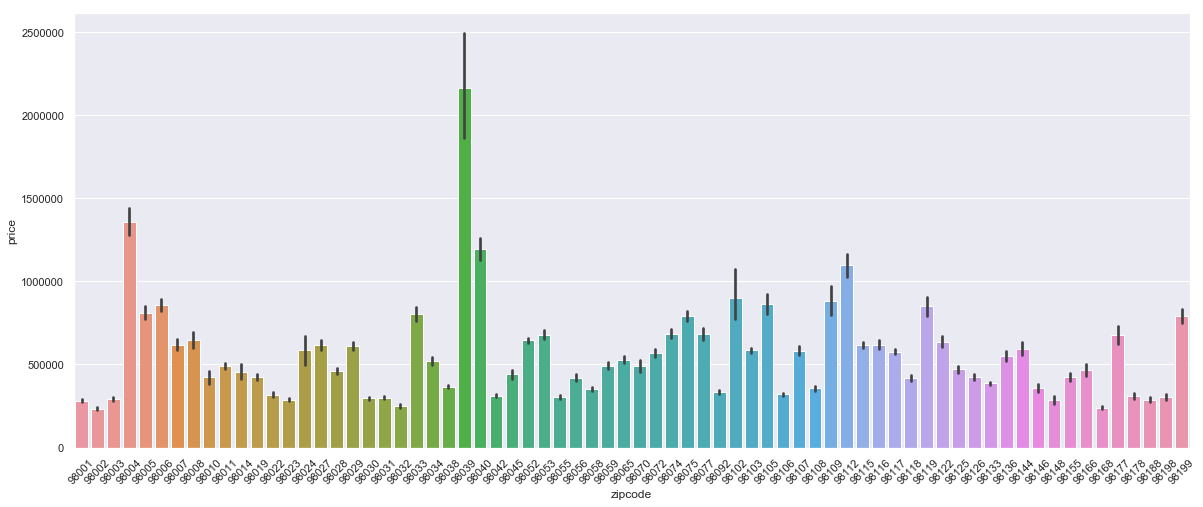

In [48]:
plt.figure(figsize=(20,8))
zc = sns.barplot(x = 'zipcode', y ='price', data = df)
for item in zc.get_xticklabels():
    item.set_rotation(45)

In [346]:
def group_zips(z):
    if z in [98177, 98133, 98125, 98155]:
        return 'Shoreline'
    
    elif z in [98028, 98011, 98072, 98077]:
        return 'Northshore'
    
    elif z in [98019, 98014]:
        return 'Riverview'
    
    elif z in [98117, 98103, 98115, 98107, 98105, 98199, 98119, 98109, 98102, 
               98112, 98122, 98116, 98136, 98126,
               98106, 98144, 98108, 98118]:
        return 'Seattle'
    
    elif z in [98040]:
        return 'MercerIsland'
    
    elif z in [98034, 98052, 98053, 98033, 98074]:
        return 'LakeWashington'
    
    elif z in [98039, 98004, 98005, 98007, 98008, 98006]:
        return 'Bellevue'
    
    elif z in [98059, 98027, 98075, 98029]:
        return 'Issaquah'
    
    elif z in [98024, 98065, 98045]:
        return 'SnoqualmieValley'
    
    elif z in [98168]:
        return 'Tukwila'
    
    elif z in [98178, 98056, 98055]:
        return 'Renton'
    
    elif z in [98070]:
        return 'VashonIsland'
    
    elif z in [98146, 98166, 98148, 98188]:
        return 'Highline'
    
    elif z in [98198, 98023, 98003, 98001]:
        return 'FederalWay'
    
    elif z in [98032, 98031, 98030, 98042, 98058]:
        return 'Kent'
    
    elif z in [98002, 98092]:
        return 'Auburn'
    
    elif z in [98038]:
        return 'Tahoma'
    
    elif z in [98022, 98010]:
        return 'Enumclaw'

In [347]:
df['zipcode'] = df['zipcode'].map(group_zips)

In [348]:
df['zipcode'].head()

0            Renton
1         Shoreline
2        Northshore
3           Seattle
4    LakeWashington
Name: zipcode, dtype: object

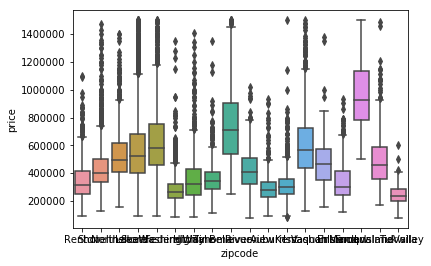

In [349]:
sns.boxplot(x = 'zipcode', y = 'price', data = dfh)

## One Hot Encode Categorical Variables

In [350]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(df.zipcode.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns = ['SD_' + str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
dfh = pd.concat([df, dfOneHot], axis = 1)
dfh.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
0,221900.0,3.0,1.00,5650.0,1.0,0.0,0.0,3.0,7.0,Renton,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,7242.0,2.0,0.0,0.0,3.0,7.0,Shoreline,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,180000.0,2.0,1.00,10000.0,1.0,0.0,0.0,3.0,6.0,Northshore,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4.0,3.00,5000.0,1.0,0.0,0.0,5.0,7.0,Seattle,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3.0,2.00,8080.0,1.0,0.0,0.0,3.0,8.0,LakeWashington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [351]:
dfh.drop(['zipcode'], axis = 1, inplace = True)

# Linear Regression in Statsmodels

In [57]:
formula = 'price ~ sqft_living'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                 1.515e+04
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:16:48   Log-Likelihood:            -2.7869e+05
No. Observations:               20548   AIC:                         5.574e+05
Df Residuals:                   20546   BIC:                         5.574e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.953e+04   3505.341     28.394      0.000    9.27e+04    1.06e+05
sqft_living   199.1807      1.618    123.066      0.000     196.008     202.353
==============================================================================
Omnibus:                     2851.873   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5280.348
Skew:                           0.894   Prob(JB):                         0.00
Kurtosis:                       4.724   Cond. No.                     5.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
formula = 'price ~ sqft_lot'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     305.0
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           8.35e-68
Time:                        21:24:30   Log-Likelihood:            -2.8421e+05
No. Observations:               20548   AIC:                         5.684e+05
Df Residuals:                   20546   BIC:                         5.684e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.718e+05   2339.670    201.662      0.000    4.67e+05    4.76e+05
sqft_lot       2.7755      0.159     17.464      0.000       2.464       3.087
==============================================================================
Omnibus:                     4142.290   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7904.378
Skew:                           1.241   Prob(JB):                         0.00
Kurtosis:                       4.752   Cond. No.                     2.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
formula = 'price ~ floors'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1657.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:24:44   Log-Likelihood:            -2.8356e+05
No. Observations:               20548   AIC:                         5.671e+05
Df Residuals:                   20546   BIC:                         5.671e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.133e+05   4870.168     64.326      0.000    3.04e+05    3.23e+05
floors      1.255e+05   3082.641     40.705      0.000    1.19e+05    1.32e+05
==============================================================================
Omnibus:                     4131.931   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7971.706
Skew:                           1.231   Prob(JB):                         0.00
Kurtosis:                       4.802   Cond. No.                         6.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
formula = 'price ~ waterfront'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     155.8
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           1.24e-35
Time:                        21:25:01   Log-Likelihood:            -2.8428e+05
No. Observations:               20548   AIC:                         5.686e+05
Df Residuals:                   20546   BIC:                         5.686e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.984e+05   1724.280    289.023      0.000    4.95e+05    5.02e+05
waterfront  3.688e+05   2.95e+04     12.483      0.000    3.11e+05    4.27e+05
==============================================================================
Omnibus:                     4171.056   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7963.744
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                       4.748   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
formula = 'price ~ view'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2235.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:25:14   Log-Likelihood:            -2.8330e+05
No. Observations:               20548   AIC:                         5.666e+05
Df Residuals:                   20546   BIC:                         5.666e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.777e+05   1705.347    280.093      0.000    4.74e+05    4.81e+05
view         1.13e+05   2390.986     47.280      0.000    1.08e+05    1.18e+05
==============================================================================
Omnibus:                     3784.829   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7003.666
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                       4.688   Cond. No.                         1.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
formula = 'price ~ condition'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     27.32
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           1.74e-07
Time:                        21:25:32   Log-Likelihood:            -2.8435e+05
No. Observations:               20548   AIC:                         5.687e+05
Df Residuals:                   20546   BIC:                         5.687e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.521e+05   9244.895     48.908      0.000    4.34e+05     4.7e+05
condition   1.392e+04   2663.317      5.226      0.000    8699.359    1.91e+04
==============================================================================
Omnibus:                     4206.864   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8066.712
Skew:                           1.258   Prob(JB):                         0.00
Kurtosis:                       4.760   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
formula = 'price ~ yrs_old'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     46.76
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           8.26e-12
Time:                        21:26:06   Log-Likelihood:            -2.8434e+05
No. Observations:               20548   AIC:                         5.687e+05
Df Residuals:                   20546   BIC:                         5.687e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.171e+05   3089.033    167.409      0.000    5.11e+05    5.23e+05
yrs_old     -401.6197     58.734     -6.838      0.000    -516.743    -286.497
==============================================================================
Omnibus:                     4230.418   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8110.309
Skew:                           1.265   Prob(JB):                         0.00
Kurtosis:                       4.753   Cond. No.                         94.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
formula = 'price ~ day_sold'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.506
Date:                Mon, 08 Feb 2021   Prob (F-statistic):              0.113
Time:                        21:26:22   Log-Likelihood:            -2.8436e+05
No. Observations:               20548   AIC:                         5.687e+05
Df Residuals:                   20546   BIC:                         5.687e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.049e+05   3782.380    133.498      0.000    4.98e+05    5.12e+05
day_sold     -28.8805     18.243     -1.583      0.113     -64.638       6.877
==============================================================================
Omnibus:                     4211.612   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8068.356
Skew:                           1.260   Prob(JB):                         0.00
Kurtosis:                       4.754   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
formula = 'price ~ renovated'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     32.84
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           1.01e-08
Time:                        21:26:37   Log-Likelihood:            -2.8434e+05
No. Observations:               20548   AIC:                         5.687e+05
Df Residuals:                   20546   BIC:                         5.687e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.945e+05   1943.631    254.419      0.000    4.91e+05    4.98e+05
renovated   2.425e+04   4231.594      5.731      0.000     1.6e+04    3.25e+04
==============================================================================
Omnibus:                     4185.800   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7988.773
Skew:                           1.254   Prob(JB):                         0.00
Kurtosis:                       4.743   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
formula = 'price ~ basement'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     694.1
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          1.77e-150
Time:                        21:26:57   Log-Likelihood:            -2.8402e+05
No. Observations:               20548   AIC:                         5.680e+05
Df Residuals:                   20546   BIC:                         5.681e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.628e+05   2199.868    210.380      0.000    4.58e+05    4.67e+05
basement    9.127e+04   3464.247     26.347      0.000    8.45e+04    9.81e+04
==============================================================================
Omnibus:                     4165.309   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7909.565
Skew:                           1.252   Prob(JB):                         0.00
Kurtosis:                       4.724   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
formula = 'price ~ distance_from_city'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.689
Date:                Mon, 08 Feb 2021   Prob (F-statistic):              0.101
Time:                        21:27:15   Log-Likelihood:            -2.8436e+05
No. Observations:               20548   AIC:                         5.687e+05
Df Residuals:                   20546   BIC:                         5.687e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.039e+05   3152.178    159.869      0.000    4.98e+05     5.1e+05
distance_from_city  -465.0394    283.571     -1.640      0.101   -1020.861      90.782
==============================================================================
Omnibus:                     4208.874   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8059.005
Skew:                           1.259   Prob(JB):                         0.00
Kurtosis:                       4.752   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
dfh.corr()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,lat,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
price,1.000000,0.317668,0.488172,0.087231,0.277850,0.084968,0.303523,0.033624,0.666022,0.393922,...,-0.009646,-0.005312,-0.007531,-0.003888,0.003417,-0.010819,0.008537,-0.003917,-0.004041,-0.003413
bedrooms,0.317668,1.000000,0.515678,0.029451,0.170611,-0.034903,0.052687,0.020674,0.345718,-0.021775,...,-0.002439,-0.000773,0.000355,-0.006304,0.000041,0.000564,-0.007396,-0.000257,-0.004192,-0.007965
bathrooms,0.488172,0.515678,1.000000,0.072564,0.503505,0.001162,0.126518,-0.136066,0.635039,0.006267,...,-0.017935,-0.005739,-0.008306,0.002822,0.012505,-0.013384,0.008558,0.013404,-0.013915,-0.012676
sqft_lot,0.087231,0.029451,0.072564,1.000000,-0.015616,0.023786,0.069785,-0.005061,0.098697,-0.092786,...,0.000310,0.004530,-0.010201,0.000827,-0.000911,-0.005514,0.000306,-0.001446,0.002884,-0.002119
floors,0.277850,0.170611,0.503505,-0.015616,1.000000,-0.003623,0.000450,-0.271430,0.456509,0.043001,...,-0.013257,-0.010706,-0.000354,0.004776,0.020512,-0.022249,0.007944,0.012223,-0.009302,-0.011774
waterfront,0.084968,-0.034903,0.001162,0.023786,-0.003623,1.000000,0.295710,0.012787,-0.000212,-0.034496,...,-0.006187,-0.005097,-0.000917,-0.007329,-0.003105,0.017269,0.014212,-0.010104,-0.006813,-0.004452
view,0.303523,0.052687,0.126518,0.069785,0.000450,0.295710,1.000000,0.034719,0.179232,-0.012548,...,-0.006880,-0.003126,0.001110,-0.000980,-0.003822,0.003501,-0.003819,-0.002427,-0.005816,-0.000926
condition,0.033624,0.020674,-0.136066,-0.005061,-0.271430,0.012787,0.034719,1.000000,-0.163861,-0.017568,...,0.000511,-0.004043,-0.002451,-0.013260,-0.010075,-0.006321,-0.005514,-0.000582,0.013550,0.015517
grade,0.666022,0.345718,0.635039,0.098697,0.456509,-0.000212,0.179232,-0.163861,1.000000,0.099696,...,-0.016264,-0.002972,-0.009393,0.009967,0.009502,-0.012456,0.013418,0.005199,0.001123,-0.014295
lat,0.393922,-0.021775,0.006267,-0.092786,0.043001,-0.034496,-0.012548,-0.017568,0.099696,1.000000,...,0.000478,-0.004795,-0.007971,0.006772,-0.001447,-0.001789,-0.002096,-0.011896,-0.012496,0.013550


In [219]:
dfh.drop(['lat', 'long'], axis = 1, inplace = True)

In [220]:
dfh.drop(['yrs_old', 'month_sold'], axis = 1, inplace = True)

In [355]:
dfh.drop(['basement'], axis = 1, inplace = True)

In [401]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [402]:
outcome = 'price'
predictors = dfh.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [403]:
model = ols(formula=formula, data=dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1362.
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:52:28   Log-Likelihood:            -2.5710e+05
No. Observations:               19672   AIC:                         5.143e+05
Df Residuals:                   19643   BIC:                         5.145e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.872e+05   9407.179    -51.789      0.000   -5.06e+05   -4.69e+05
bedrooms             1.345e+04   1100.779     12.222      0.000    1.13e+04    1.56e+04
bathrooms            5.363e+04   1809.680     29.637      0.000    5.01e+04    5.72e+04
sqft_lot                0.5781      0.021     27.451      0.000       0.537       0.619
floors                1.41e+04   1959.293      7.198      0.000    1.03e+04    1.79e+04
waterfront            1.31e+05    1.7e+04      7.707      0.000    9.77e+04    1.64e+05
view                 3.038e+04   1406.034     21.608      0.000    2.76e+04    3.31e+04
condition            2.321e+04   1365.025     17.003      0.000    2.05e+04    2.59e+04
grade                1.051e+05   1098.570     95.696      0.000    1.03e+05    1.07e+05
yrs_old              1306.1002     41.911     31.163      0.000    1223.950    1388.250
renovated            4694.1089   2036.706      2.305      0.021     701.993    8686.225
distance_from_city  -1.318e+04    147.201    -89.544      0.000   -1.35e+04   -1.29e+04
SD_Auburn           -1.978e+04   4964.580     -3.984      0.000   -2.95e+04      -1e+04
SD_Bellevue         -2.886e+04   3410.638     -8.462      0.000   -3.55e+04   -2.22e+04
SD_Enumclaw         -3.015e+04   6394.077     -4.715      0.000   -4.27e+04   -1.76e+04
SD_FederalWay       -2.861e+04   3259.006     -8.779      0.000    -3.5e+04   -2.22e+04
SD_Highline         -3.029e+04   4355.560     -6.953      0.000   -3.88e+04   -2.17e+04
SD_Issaquah         -2.733e+04   3150.438     -8.675      0.000   -3.35e+04   -2.12e+04
SD_Kent             -2.713e+04   3052.456     -8.888      0.000   -3.31e+04   -2.11e+04
SD_LakeWashington   -2.805e+04   2663.383    -10.531      0.000   -3.33e+04   -2.28e+04
SD_MercerIsland     -2.324e+04   7502.695     -3.098      0.002   -3.79e+04   -8537.359
SD_Northshore       -2.242e+04   3852.637     -5.820      0.000      -3e+04   -1.49e+04
SD_Renton           -2.731e+04   3880.788     -7.037      0.000   -3.49e+04   -1.97e+04
SD_Riverview        -3.583e+04   6432.165     -5.570      0.000   -4.84e+04   -2.32e+04
SD_Seattle          -2.899e+04   1977.428    -14.660      0.000   -3.29e+04   -2.51e+04
SD_Shoreline         -2.81e+04   3123.203     -8.998      0.000   -3.42e+04    -2.2e+04
SD_SnoqualmieValley -2.791e+04   4740.456     -5.887      0.000   -3.72e+04   -1.86e+04
SD_Tahoma           -2.921e+04   4787.410     -6.102      0.000   -3.86e+04   -1.98e+04
SD_Tukwila          -2.141e+04   7038.777     -3.042      0.002   -3.52e+04   -7614.940
SD_VashonIsland     -2.257e+04   1.05e+04     -2.141      0.032   -4.32e+04   -1910.273
==============================================================================
Omnibus:                      813.207   Durbin-Watson:                   1.976
Prob(Omnibus):       

# Model Validation

In [360]:
dfh.corr()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yrs_old,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
price,1.000000,0.318191,0.488186,0.087232,0.277853,0.084968,0.303525,0.033626,0.666028,-0.059793,...,-0.011021,-0.004468,-0.001925,-0.005352,-0.000795,-0.003006,0.000228,-0.008987,0.000481,0.001501
bedrooms,0.318191,1.000000,0.516084,0.029602,0.170523,-0.034940,0.052896,0.020966,0.346543,-0.165800,...,-0.017933,-0.006975,-0.007226,-0.013774,-0.001428,0.010019,-0.009402,0.004514,-0.003499,-0.005513
bathrooms,0.488186,0.516084,1.000000,0.072582,0.503478,0.001166,0.126540,-0.136035,0.635099,-0.531848,...,-0.021981,-0.006555,-0.010444,-0.007464,0.012536,-0.006449,0.004647,0.009598,-0.010422,-0.007028
sqft_lot,0.087232,0.029602,0.072582,1.000000,-0.015605,0.023785,0.069782,-0.005069,0.098691,-0.046906,...,-0.006312,0.006185,-0.004561,0.005448,0.001010,-0.002797,-0.000859,-0.004196,-0.000724,0.005357
floors,0.277853,0.170523,0.503478,-0.015605,1.000000,-0.003620,0.000463,-0.271410,0.456546,-0.500139,...,-0.020768,-0.007490,0.002378,-0.004331,0.023941,-0.018908,0.009315,0.014490,-0.011100,-0.009996
waterfront,0.084968,-0.034940,0.001166,0.023785,-0.003620,1.000000,0.295710,0.012786,-0.000213,0.037796,...,-0.006201,-0.005166,0.006976,-0.007317,-0.014112,0.004827,0.019171,-0.005208,0.000543,0.006627
view,0.303525,0.052896,0.126540,0.069782,0.000463,0.295710,1.000000,0.034711,0.179227,0.063696,...,-0.004978,-0.001858,0.005955,0.002005,0.001109,0.005608,-0.006994,-0.016707,-0.006604,0.003017
condition,0.033626,0.020966,-0.136035,-0.005069,-0.271410,0.012786,0.034711,1.000000,-0.163879,0.356680,...,0.007438,0.007570,-0.002190,-0.006873,-0.015765,0.001590,0.001980,0.003423,0.010764,0.021037
grade,0.666028,0.346543,0.635099,0.098691,0.456546,-0.000213,0.179227,-0.163879,1.000000,-0.474444,...,-0.018210,-0.004568,-0.003725,0.003204,0.018651,-0.009260,0.004415,-0.003936,-0.006294,-0.008604
yrs_old,-0.059793,-0.165800,-0.531848,-0.046906,-0.500139,0.037796,0.063696,0.356680,-0.474444,1.000000,...,0.019604,0.001328,0.003945,-0.005817,-0.021525,0.018358,-0.022540,-0.011841,0.014890,0.012382


In [144]:
df.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,yrs_old,day_sold,renovated,basement,distance_from_city
count,2.054800e+04,20548.000000,20548.000000,20548.000000,20548.000000,20548.000000,20548.000000,20548.000000,20548.000000,20548.000000,20548.000000,20548.000000,20548.000000,20548.000000
mean,4.996127e+05,3.354730,2008.641571,10012.734573,1.485011,0.003407,0.194228,3.410113,98079.201577,43.619136,184.440383,0.210969,0.403251,9.297501
std,2.476747e+05,0.917308,810.011389,10792.414629,0.539205,0.058268,0.686301,0.648346,53.611271,29.385731,94.710890,0.408007,0.490562,6.092958
min,1.000000e+05,1.000000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,98001.000000,-1.000000,2.000000,0.000000,0.000000,0.254331
25%,3.179875e+05,3.000000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,98033.000000,18.000000,110.000000,0.000000,0.000000,4.673479
50%,4.425000e+05,3.000000,1880.000000,7470.500000,1.000000,0.000000,0.000000,3.000000,98072.000000,40.000000,178.000000,0.000000,0.000000,7.603560
75%,6.222750e+05,4.000000,2480.000000,10125.000000,2.000000,0.000000,0.000000,4.000000,98118.000000,63.000000,262.000000,0.000000,1.000000,11.684807
max,1.500000e+06,33.000000,7480.000000,99916.000000,3.500000,1.000000,4.000000,5.000000,98199.000000,115.000000,365.000000,1.000000,1.000000,41.907930


In [367]:
dfh.dropna(inplace = True)

In [368]:
dfh.isnull().sum()

price                  0
bedrooms               0
bathrooms              0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
yrs_old                0
renovated              0
distance_from_city     0
SD_Auburn              0
SD_Bellevue            0
SD_Enumclaw            0
SD_FederalWay          0
SD_Highline            0
SD_Issaquah            0
SD_Kent                0
SD_LakeWashington      0
SD_MercerIsland        0
SD_Northshore          0
SD_Renton              0
SD_Riverview           0
SD_Seattle             0
SD_Shoreline           0
SD_SnoqualmieValley    0
SD_Tahoma              0
SD_Tukwila             0
SD_VashonIsland        0
dtype: int64

In [404]:
y = dfh[['price']]
X = dfh.drop(['price'], axis = 1)

In [405]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [406]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15737 3935 15737 3935


In [407]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [408]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 13207473958.796438
Test Mean Squarred Error: 13039437947.018492


In [409]:
resid = model.resid

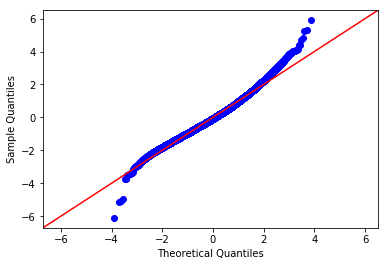

In [410]:
fig = sm.graphics.qqplot(resid, dist = stats.norm, line = '45', fit = True)

In [379]:
X_train.shape

(16465, 29)

In [380]:
X_test.shape

(4117, 29)

In [381]:
y_train.shape

(16465, 1)

In [382]:
y_test.shape

(4117, 1)

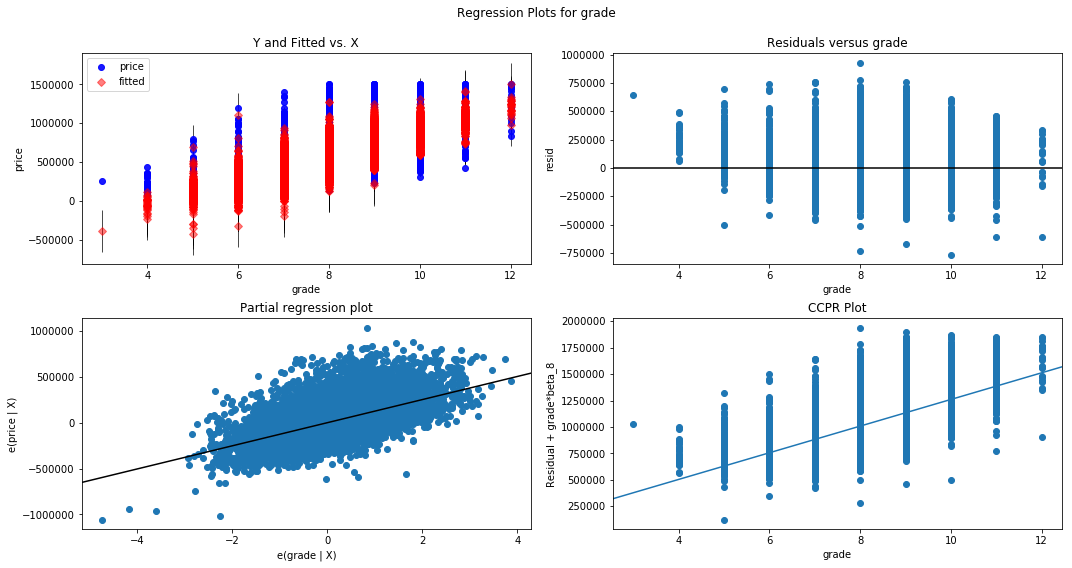

In [383]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

# Cross Validation

In [397]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [398]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-15835429502.43102
-15838303401.260838
-15812199741.439505
